In [5]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
import os

csv_path = 'fake_job_postings.csv'
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Dataset not found at {csv_path}. Please download from Kaggle.")   
df = pd.read_csv(csv_path)
print(f"Dataset loaded successfully. Shape: {df.shape}")

Dataset loaded successfully. Shape: (17880, 18)


In [7]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# DATA Prepare

In [8]:
# I need only title and description as input and is_scam as output
final_df=pd.DataFrame({
    "Title":df['title'],
    "Description":df['description'],
    'Is_Scam':df['fraudulent']
})

In [9]:
final_df.shape

(17880, 3)

# EDA

In [10]:
# lets check null values in title column
final_df[final_df['Title'].isnull()]    # we can see there is no null value in it

,Title,Description,Is_Scam


In [11]:
# lets check nulll value in description column
final_df[final_df['Description'].isnull()]   # we can see there is none null value in it

,Title,Description,Is_Scam
17513,Office Manager,NaN,1


In [12]:
# lets fill this null value by " " string
final_df = final_df.copy()  # Create explicit copy to avoid warning
final_df['Description'] = final_df['Description'].fillna("")
final_df['Description'].isnull().sum()

0

In [13]:
#lets chk null value in target column
final_df[final_df['Is_Scam'].isnull()]  # there is also no null value

,Title,Description,Is_Scam


In [14]:
# lets see duplicates
final_df.duplicated().sum()

2093

In [15]:
# as we can see there is 2093 duplicates now we see that whole row is duplicate or not
final_df[final_df.duplicated()].head(10)

,Title,Description,Is_Scam
40,English Teacher Abroad,"Play with kids, get paid for it Love travel? J...",0
48,English Teacher Abroad,"Play with kids, get paid for it Love travel? J...",0
80,English Teacher Abroad,"Play with kids, get paid for it Love travel? J...",0
89,English Teacher Abroad,"Play with kids, get paid for it Love travel? J...",0
99,English Teacher Abroad,"Play with kids, get paid for it Love travel? J...",0
101,English Teacher Abroad,"Play with kids, get paid for it Love travel? J...",0
119,English Teacher Abroad,"Play with kids, get paid for it Love travel? J...",0
122,English Teacher Abroad,"Play with kids, get paid for it Love travel? J...",0
123,English Teacher Abroad,"Play with kids, get paid for it Love travel? J...",0
133,English Teacher Abroad,"Play with kids, get paid for it Love travel? J...",0


In [16]:
final_df.drop_duplicates(inplace=True)

In [17]:
# now see duplictes
final_df.duplicated().sum()

0

In [18]:
final_df['Is_Scam'].value_counts()   # we can easily see that our data is imbalanced

Is_Scam
0    15114
1      673
Name: count, dtype: int64

In [17]:
# lets download its pandas profile so we can easily done EDA
from ydata_profiling import ProfileReport

profile=ProfileReport(final_df,title="JOB Internship Scam EDA")
profile.to_file("JOB_internship_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.43s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# now our data is ready for model 

In [19]:
X=final_df.iloc[:,:-1]
X.columns

Index(['Title', 'Description'], dtype='object')

In [20]:
Y=final_df['Is_Scam']
Y

0        0
1        0
2        0
3        0
4        0
        ..
17874    0
17875    0
17876    0
17877    0
17878    0
Name: Is_Scam, Length: 15787, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import ComplementNB  # best for unbalanced data
from imblearn.pipeline import Pipeline  # for making pipeline
from sklearn.feature_extraction.text import TfidfVectorizer # for encoding
from sklearn.compose import ColumnTransformer   # for apply encoding on both column
from imblearn.over_sampling import SMOTE  # for oversampling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=42)
X_train.shape

(12629, 2)

In [23]:
vectorizer=TfidfVectorizer()
Smoting=SMOTE(random_state=42)
model=ComplementNB()

In [24]:
columnTrf=ColumnTransformer(
    [('trf1',vectorizer,'Title'),
     ('trf2',vectorizer,'Description')]
)

In [25]:
pipe=Pipeline([
    ('pp1',columnTrf),
    ('pp2',Smoting),
    ('pp3',model)
])

In [26]:
param_grid = [
    {
        'pp3': [ComplementNB()]
    },
    {
        'pp3': [LogisticRegression(max_iter=1000,class_weight={0: 1, 1: 8})],
        'pp3__C': [0.1, 1, 10]
    },
    {
        'pp3': [RandomForestClassifier()],
        'pp3__n_estimators': [50, 100],
        'pp3__max_depth': [None, 10]
    },
    {
        'pp3': [XGBClassifier(scale_pos_weight=5/10/15)]
    }

]

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pp1',
                                        ColumnTransformer(transformers=[('trf1',
                                                                         TfidfVectorizer(),
                                                                         'Title'),
                                                                        ('trf2',
                                                                         TfidfVectorizer(),
                                                                         'Description')])),
                                       ('pp2', SMOTE(random_state=42)),
                                       ('pp3', ComplementNB())]),
             n_jobs=-1,
             param_grid=[{'pp3': [ComplementNB()]},
                         {'pp3': [LogisticRegression(class_weight={0: 1, 1: 8},
                                                     max_iter=1000)],
                          'pp3__C': [0.1, 1, 10]...
                                                gamma=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=None,
                                                max_bin=None,
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None, ...)]}],
             scoring='recall')

In [28]:
print("Best Model:", grid.best_estimator_)
print("Best Params:", grid.best_params_)

Best Model: Pipeline(steps=[('pp1',
                 ColumnTransformer(transformers=[('trf1', TfidfVectorizer(),
                                                  'Title'),
                                                 ('trf2', TfidfVectorizer(),
                                                  'Description')])),
                ('pp2', SMOTE(random_state=42)),
                ('pp3',
                 LogisticRegression(C=0.1, class_weight={0: 1, 1: 8},
                                    max_iter=1000))])
Best Params: {'pp3': LogisticRegression(class_weight={0: 1, 1: 8}, max_iter=1000), 'pp3__C': 0.1}


In [31]:
Y_predicted=grid.predict(X_test)

# Now we are ready for accuracy checking

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,r2_score, ConfusionMatrixDisplay

In [33]:
report=classification_report(Y_test,Y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      3023
           1       0.16      0.86      0.27       135

    accuracy                           0.80      3158
   macro avg       0.58      0.83      0.58      3158
weighted avg       0.96      0.80      0.86      3158



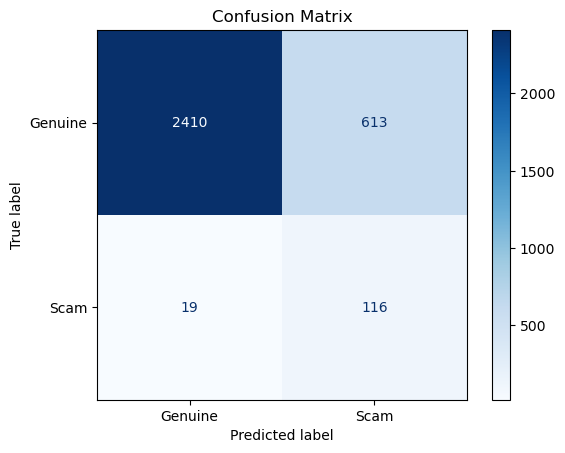

In [34]:
c_m=confusion_matrix(Y_test,Y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=c_m, display_labels=["Genuine", "Scam"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# NOw our model is ready 
# Conclusion :
   Dataset size : 17880,
   Data type : Imbalanced data,
   best model fit : Logistic regression
   Whole process is doone by pipeline

In [35]:
# now save it for webapp
import joblib
joblib.dump(grid,"Job_Internship_model.pkl")

['Job_Internship_model.pkl']